<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png"  width = 200, align = "center">

<h1 align=center><font size = 5>Using Dropout in Regression Assignment   </font></h1> 

# Table of Contents
in this lab, you will see how adding dropout to your model will decrease overfitting with <code>nn.Sequential</code>.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Make Some Data </a></li>
<li><a href="#ref1">Create the Model and Cost Function the Pytorch way</a></li>
<li><a href="#ref2">Batch Gradient Descent</a></li>
<br>
<p></p>
Estimated Time Needed: <strong>20 min</strong>
</div>

<hr>

Import all the libraries you need for this lab:  

In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn

import numpy as np

<a id="ref0"></a>
<h2 align=center>Get Some Data </h2>

Create polynomial dataset objects: 

In [2]:
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
    def __init__(self,N_SAMPLES = 40,noise_std=1,train=True):
      
      
        self.x = torch.linspace(-1, 1, N_SAMPLES).view(-1,1)
        self.f=self.x**2
        
        if train!=True:
            torch.manual_seed(1)
         
            self.y = self.f+noise_std*torch.randn(self.f.size())
            self.y=self.y.view(-1,1)
            torch.manual_seed(0)
        else:
            self.y = self.f+noise_std*torch.randn(self.f.size())
            self.y=self.y.view(-1,1)
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len
    def plot(self):
        plt.figure(figsize=(6.1, 10))
        plt.scatter(self.x.numpy(), self.y.numpy(), label="Samples")
        plt.plot(self.x.numpy(), self.f.numpy()  ,label="True function",color='orange')
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((-1, 1))
        plt.ylim((-2, 2.5))
        plt.legend(loc="best")
        plt.show()

Create a dataset object:

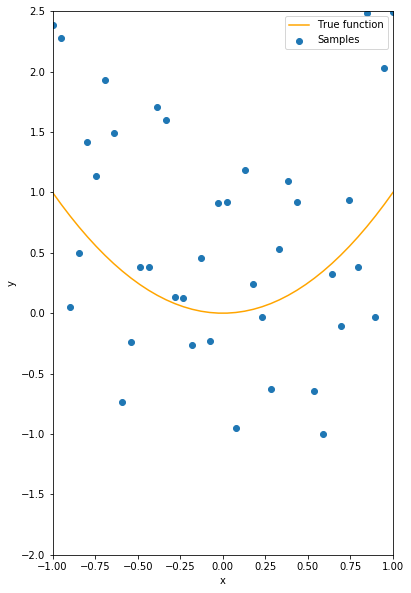

In [3]:
data_set=Data()
data_set.plot()

Get some validation data: 

In [4]:
torch.manual_seed(0) 
validation_set=Data(train=False)

<a id="ref1"></a>
<h2 align=center>Create the Model, Optimizer, and Total Loss Function (cost)</h2>

In [5]:
torch.manual_seed(4) 

### Create a three-layer neural network <code>model</code> with a ReLU() activation function for regression. All the appropriate layers should be 300 units.

In [7]:
n_hidden = 300
model= torch.nn.Sequential(
    torch.nn.Linear(1, n_hidden), 
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, n_hidden),

    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, 1),
)

Double-click __here__ for the solution.

<!-- Your answer is below:

n_hidden = 30
model= torch.nn.Sequential(
    torch.nn.Linear(1, n_hidden), 
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, n_hidden),

    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, 1),
)
-->


### Create a three-layer neural network <code>model_drop</code> with a ReLU() activation function for regression. All the appropriate layers should be 300 units. Apply dropout to all but the last layer and make the probability of dropout is 50%.

In [8]:
n_hidden = 300
model_drop= torch.nn.Sequential(
    torch.nn.Linear(1, n_hidden),
    torch.nn.Dropout(0.5),  
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, n_hidden),
    torch.nn.Dropout(0.5), 
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, 1),
)

Double-click __here__ for the solution.
<!-- Your answer is below:
n_hidden = 300
model_drop= torch.nn.Sequential(
    torch.nn.Linear(1, n_hidden),
    torch.nn.Dropout(0.5),  
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, n_hidden),
    torch.nn.Dropout(0.5), 
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden, 1),
)
-->


<a id="ref2"></a>
<h2 align=center>Train the Model via Mini-Batch Gradient Descent </h2>

Set the model using dropout to training mode; this is the default mode, but it's a good practice. 

In [9]:
model_drop.train()

Sequential(
  (0): Linear(in_features=1, out_features=300, bias=True)
  (1): Dropout(p=0.5)
  (2): ReLU()
  (3): Linear(in_features=300, out_features=300, bias=True)
  (4): Dropout(p=0.5)
  (5): ReLU()
  (6): Linear(in_features=300, out_features=1, bias=True)
)

Train the model by using the Adam optimizer. See the unit on other optimizers. Use the mean square loss: 

In [10]:
optimizer_ofit = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(model_drop.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

Initialize a dictionary that stores the training and validation loss for each model:

In [11]:
LOSS={}
LOSS['training data no dropout']=[]
LOSS['validation data no dropout']=[]
LOSS['training data dropout']=[]
LOSS['validation data dropout']=[]

Run 500 iterations of batch gradient decent:

In [12]:
epochs=500

for epoch in range(epochs):
    #make a prediction for both models 
    yhat = model(data_set.x)
    yhat_drop = model_drop(data_set.x)
    #calculate the lossf or both models 
    loss = criterion(yhat, data_set.y)
    loss_drop = criterion(yhat_drop, data_set.y)
    
    #store the loss for  both the training and validation  data for both models 
    LOSS['training data no dropout'].append(loss.item())
    LOSS['validation data no dropout'].append(criterion(model(validation_set.x), validation_set.y).item())
    LOSS['training data dropout'].append(loss_drop.item())
    model_drop.eval()
    LOSS['validation data dropout'].append(criterion(model_drop(validation_set.x), validation_set.y).item())
    model_drop.train()
    
    #clear gradient 
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    #Backward pass: compute gradient of the loss with respect to all the learnable parameters
    loss.backward()
    loss_drop.backward()
    #the step function on an Optimizer makes an update to its parameters
    optimizer_ofit.step()
    optimizer_drop.step()

### Make a prediction by using the test set assign <code>model</code> to yhat and <code>model_drop</code> to yhat_drop.

In [14]:
yhat=model(data_set.x)
model_drop.eval()
yhat_drop=model_drop(data_set.x)

Double-click __here__ for the solution.
<!-- Your answer is below:
yhat=model(data_set.x)
model_drop.eval()
yhat_drop=model_drop(data_set.x),
)
-->


Plot predictions of both models. Compare them to the training points and the true function:

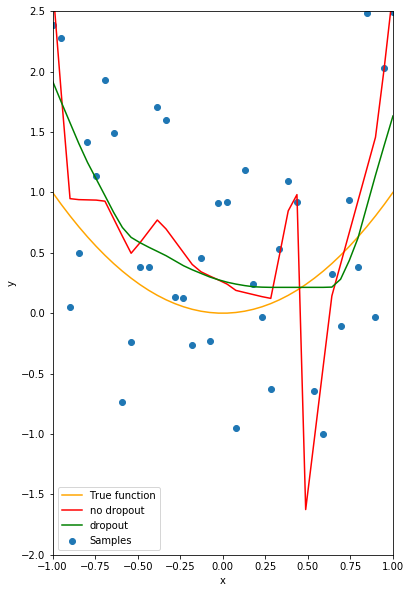

In [15]:
plt.figure(figsize=(6.1, 10))

plt.scatter(data_set.x.numpy(), data_set.y.numpy(), label="Samples")
plt.plot(data_set.x.numpy(), data_set.f.numpy()  ,label="True function",color='orange')
plt.plot(data_set.x.numpy(),yhat.detach().numpy(),label='no dropout',c='r')
plt.plot(data_set.x.numpy(),yhat_drop.detach().numpy(),label="dropout",c='g')


plt.xlabel("x")
plt.ylabel("y")
plt.xlim((-1, 1))
plt.ylim((-2, 2.5))
plt.legend(loc="best")
plt.show()

You can see that the model using dropout does better at tracking the function that generated the data. 

Plot out the loss for training and validation data on both models:  

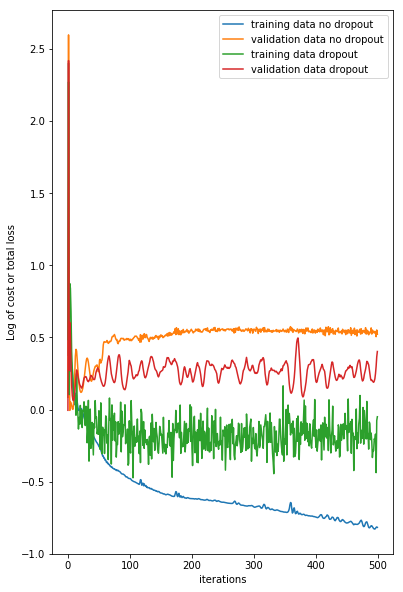

In [16]:
plt.figure(figsize=(6.1, 10))
for key, value in LOSS.items():
    plt.plot(np.log(np.array(value)),label=key)
    plt.legend()
    plt.xlabel("iterations")
    plt.ylabel("Log of cost or total loss")

<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_bottom"><img src = "http://cocl.us/pytorch_image_bottom" width = 950, align = "center"></a>

### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/) ,[Morvan Youtube channel]( https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/)

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).